# Initializing Packages and Libraries

In [35]:
# Installing Packages
!pip install alpaca-py
!pip install certifi
!pip install python-dateutil
!pip install matplotlib
!pip install pandas
!pip install numpy

# Importing Libraries
import math
import ssl
import certifi
import urllib.request
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
from alpaca.data import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame
from alpaca.trading.client import TradingClient
from alpaca.trading.requests import MarketOrderRequest, LimitOrderRequest, GetOrdersRequest
from alpaca.trading.enums import OrderSide, TimeInForce, OrderStatus
from alpaca_trade_api.rest import REST

# API Keys

In [ ]:
# API key and secret key see https://app.alpaca.markets/paper/dashboard/overview to generate (API keys)
API_KEY = '' # Add here your API key
API_SECRET = '' # Add here your API secret key
BASE_URL = "https://paper-api.alpaca.markets"
trading_client = TradingClient(API_KEY, API_SECRET, paper=True)

# Account information

In [37]:
account = trading_client.get_account()

# general information
print("Account ID:", account.id)
print("Account Status:", account.status)
print("Currency:", account.currency)

# finanical status
print("Buying Power:", account.buying_power)
print("Cash Balance:", account.cash)
print("Portfolio Value:", account.portfolio_value)
print("Long Market Value:", account.long_market_value)
print("Short Market Value:", account.short_market_value)
print("Equity:", account.equity)
print("Last Equity:", account.last_equity)

# trading restrictions
print("PDT (Pattern Day Trader) Status:", account.pattern_day_trader)
print("Is Trading Blocked:", account.trading_blocked)
print("Is Transfers Blocked:", account.transfers_blocked)
print("Is Account Blocked:", account.account_blocked)
print("Shorting Enabled:", account.shorting_enabled)

Account ID: 4d1b44aa-a5e9-4a26-8e65-643967f94440
Account Status: AccountStatus.ACTIVE
Currency: USD
Buying Power: 48982.75
Cash Balance: 156961.49
Portfolio Value: 95422.24
Long Market Value: 35750.4
Short Market Value: -97289.65
Equity: 95422.24
Last Equity: 92556.4962622587
PDT (Pattern Day Trader) Status: False
Is Trading Blocked: False
Is Transfers Blocked: False
Is Account Blocked: False
Shorting Enabled: True


# Market Order

In [38]:
market_order_data = MarketOrderRequest(
                    symbol="ZBRA", # adjust symbol for asset
                    qty=1, # adjust quantity
                    side=OrderSide.BUY, # adjust side (ATTENTION: no BUY and SELL orders at the same time)
                    time_in_force=TimeInForce.DAY # adjust time in force (DAY, GTC, OPG, CLS, IOC, FOK)
                    )

try:
    market_order = trading_client.submit_order(
        order_data=market_order_data
    )
    print("Market order:", market_order)
except Exception as e:
    print("Error placing market order order:", e)

Market order: id=UUID('3e580d73-fe18-4fe2-93c5-1daf8d1a7c0a') client_order_id='e0a47441-1151-4953-8254-c91e6b06062f' created_at=datetime.datetime(2025, 4, 11, 8, 23, 30, 762282, tzinfo=TzInfo(UTC)) updated_at=datetime.datetime(2025, 4, 11, 8, 23, 30, 762852, tzinfo=TzInfo(UTC)) submitted_at=datetime.datetime(2025, 4, 11, 8, 23, 30, 762282, tzinfo=TzInfo(UTC)) filled_at=None expired_at=None expires_at=datetime.datetime(2025, 4, 11, 20, 0, tzinfo=TzInfo(UTC)) canceled_at=None failed_at=None replaced_at=None replaced_by=None replaces=None asset_id=UUID('3c6eaa3f-d12a-4e72-aab5-b0e005ba631a') symbol='ZBRA' asset_class=<AssetClass.US_EQUITY: 'us_equity'> notional=None qty='1' filled_qty='0' filled_avg_price=None order_class=<OrderClass.SIMPLE: 'simple'> order_type=<OrderType.MARKET: 'market'> type=<OrderType.MARKET: 'market'> side=<OrderSide.BUY: 'buy'> time_in_force=<TimeInForce.DAY: 'day'> limit_price=None stop_price=None status=<OrderStatus.PENDING_NEW: 'pending_new'> extended_hours=Fals

# Limit Order

In [39]:
limit_order_data = LimitOrderRequest(
    symbol="BTC/USD",
    limit_price=17000,  # Adjust the price as needed
    notional=4000,      # Adjust the notional amount as needed
    side=OrderSide.BUY,
    time_in_force=TimeInForce.GTC  # Change to a valid value
)

try:
    limit_order = trading_client.submit_order(order_data=limit_order_data)
    print("Limit Order:", limit_order)
except Exception as e:
    print("Error placing limit order:", e)

Limit Order: id=UUID('39ea3eee-3cf0-48b7-8a1e-ef4b8468a48b') client_order_id='e49d8118-7779-4094-963f-8ae094984953' created_at=datetime.datetime(2025, 4, 11, 8, 23, 33, 755534, tzinfo=TzInfo(UTC)) updated_at=datetime.datetime(2025, 4, 11, 8, 23, 33, 757991, tzinfo=TzInfo(UTC)) submitted_at=datetime.datetime(2025, 4, 11, 8, 23, 33, 755534, tzinfo=TzInfo(UTC)) filled_at=None expired_at=None expires_at=datetime.datetime(2025, 7, 9, 20, 0, tzinfo=TzInfo(UTC)) canceled_at=None failed_at=None replaced_at=None replaced_by=None replaces=None asset_id=UUID('276e2673-764b-4ab6-a611-caf665ca6340') symbol='BTC/USD' asset_class=<AssetClass.CRYPTO: 'crypto'> notional='4000' qty=None filled_qty='0' filled_avg_price=None order_class=<OrderClass.SIMPLE: 'simple'> order_type=<OrderType.LIMIT: 'limit'> type=<OrderType.LIMIT: 'limit'> side=<OrderSide.BUY: 'buy'> time_in_force=<TimeInForce.GTC: 'gtc'> limit_price='17000' stop_price=None status=<OrderStatus.PENDING_NEW: 'pending_new'> extended_hours=False l

# Open Orders

In [40]:
try:
    # Create a request to fetch orders with "open" status
    open_orders_request = GetOrdersRequest(status="open")
    open_orders = trading_client.get_orders(open_orders_request)

    # Display all open orders
    if open_orders:
        for order in open_orders:
            print(f"Symbol: {order.symbol}, Side: {order.side}, Quantity: {order.qty}, Type: {order.order_type}")
    else:
        print("No open orders found.")
except Exception as e:
    print(f"Error fetching open orders: {e}")

Symbol: BTC/USD, Side: OrderSide.BUY, Quantity: None, Type: OrderType.LIMIT
Symbol: ZBRA, Side: OrderSide.BUY, Quantity: 1, Type: OrderType.MARKET
Symbol: HPE, Side: OrderSide.SELL, Quantity: 14, Type: OrderType.MARKET
Symbol: EIX, Side: OrderSide.SELL, Quantity: 3, Type: OrderType.MARKET
Symbol: NKE, Side: OrderSide.SELL, Quantity: 3, Type: OrderType.MARKET
Symbol: CDW, Side: OrderSide.SELL, Quantity: 1, Type: OrderType.MARKET
Symbol: HAL, Side: OrderSide.SELL, Quantity: 9, Type: OrderType.MARKET
Symbol: MU, Side: OrderSide.SELL, Quantity: 2, Type: OrderType.MARKET
Symbol: MHK, Side: OrderSide.SELL, Quantity: 1, Type: OrderType.MARKET
Symbol: NTAP, Side: OrderSide.SELL, Quantity: 2, Type: OrderType.MARKET
Symbol: DVN, Side: OrderSide.SELL, Quantity: 7, Type: OrderType.MARKET
Symbol: DHI, Side: OrderSide.SELL, Quantity: 1, Type: OrderType.MARKET
Symbol: VTRS, Side: OrderSide.SELL, Quantity: 27, Type: OrderType.MARKET
Symbol: STX, Side: OrderSide.SELL, Quantity: 2, Type: OrderType.MARKE

# Short Selling

In [41]:
# SELL orders are rejected when simultaneously placing a BUY order ('wash trade')
market_order_data = MarketOrderRequest(
                    symbol="ZBRA", # adjust symbol for asset
                    qty=1, # adjust quantity
                    side=OrderSide.SELL, # adjust side (ATTENTION: no BUY and SELL orders at the same time)
                    time_in_force=TimeInForce.DAY # adjust time in force (DAY, GTC, OPG, CLS, IOC, FOK)
                    )

try:
    market_order = trading_client.submit_order(
        order_data=market_order_data
    )
    print("Market order:", market_order)
except Exception as e:
    print("Error placing market order order:", e)


Error placing market order order: {"code":40310000,"existing_order_id":"3e580d73-fe18-4fe2-93c5-1daf8d1a7c0a","message":"potential wash trade detected. use complex orders","reject_reason":"opposite side market/stop order exists"}


# Shorting Restrictions

In [42]:
# shorting restrictions
# due to market conditions or broker policies (e.g., hard-to-borrow stocks) cannot be shorted
asset = trading_client.get_asset("NUE")
print(f"Symbol: {asset.symbol}")
print(f"Tradable: {asset.tradable}")
print(f"Shortable: {asset.shortable}")

Symbol: NUE
Tradable: True
Shortable: True


# Canceling Open Orders

In [43]:
# cancel all open orders (if needed)
try:
    trading_client.cancel_orders()
    print("All open orders have been cancelled.")
except Exception as e:
    print(f"Error cancelling orders: {e}")

All open orders have been cancelled.


# Stock Data

In [44]:
# Create a stock client
stock_client = StockHistoricalDataClient(API_KEY,  API_SECRET)
# Create an SSL context using certifi
ssl_context = ssl.create_default_context(cafile=certifi.where())

# URL of the Wikipedia page (for S&P 500 symbols)
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

# Fetch the HTML content using urllib with the custom SSL context
with urllib.request.urlopen(url, context=ssl_context) as response:
    html = response.read()

# Parse the HTML content using pandas
tables = pd.read_html(html)
sp500_table = tables[0]

sp500_tickers = sp500_table['Symbol'].tolist()

df_past = {}
start = datetime.now() - relativedelta(months=6)
end = datetime.now() - relativedelta(months=6) + timedelta(days=1)
while(len(df_past) == 0):
    request_params = StockBarsRequest(symbol_or_symbols=sp500_tickers,
                            timeframe=TimeFrame.Day,
                            start=start,
                            end=end)
    bars = stock_client.get_stock_bars(request_params)
    df_past = bars.df
    start = start - timedelta(days=1)
    end = end-timedelta(days=1)
df_past

df_now = {}
start = datetime.now() - timedelta(days = 2)
end = datetime.now() - timedelta(days = 1)
while(len(df_now) == 0):
    request_params = StockBarsRequest(symbol_or_symbols=sp500_tickers,
                            timeframe=TimeFrame.Day,
                            start=start,
                            end=end)
    bars = stock_client.get_stock_bars(request_params)
    df_now = bars.df
    start = start - timedelta(days=1)
    end = end-timedelta(days=1)
df_now

,,open,high,low,close,volume,trade_count,vwap
symbol,timestamp,,,,,,,
HBAN,2025-04-10 04:00:00+00:00,13.330,13.4051,12.4200,12.89,28774855.0,122703.0,12.805771
IEX,2025-04-10 04:00:00+00:00,169.410,170.3350,162.0650,166.97,807815.0,21949.0,166.379202
MKTX,2025-04-10 04:00:00+00:00,204.140,212.3600,202.7950,210.32,790314.0,25194.0,208.662043
ACGL,2025-04-10 04:00:00+00:00,91.190,92.2800,88.7100,90.58,2269481.0,34303.0,90.465336
CPAY,2025-04-10 04:00:00+00:00,313.230,314.7700,292.6700,299.74,577292.0,18650.0,300.843436
...,...,...,...,...,...,...,...,...
TT,2025-04-10 04:00:00+00:00,334.660,342.3500,325.9850,338.33,1715899.0,44157.0,337.126412
UPS,2025-04-10 04:00:00+00:00,98.115,98.1300,93.9801,96.56,7553658.0,97387.0,96.053501
INVH,2025-04-10 04:00:00+00:00,31.950,32.4500,30.7800,31.64,3461664.0,36690.0,31.552421


# Stock Data Processing

In [45]:
# stock data processing
closing_prc_past = df_past['close']
closing_prc_now = df_now['close']

# Calculate returns
returns = {}
for symbol, _ in closing_prc_now.keys():
    if(symbol in closing_prc_past.keys()):
        returns[symbol] = (closing_prc_now[symbol].iloc[0] - closing_prc_past[symbol].iloc[0]) / closing_prc_past[symbol].iloc[0]

# Sort returns by value (ascending order)
returns = dict(sorted(returns.items(), key=lambda item: item[1]))


returns_values = list(returns.values())
summary_stats = {
    "Number of Stocks": len(returns),
    "Mean Return": np.mean(returns_values),
    "Median Return": np.median(returns_values),
    "Standard Deviation": np.std(returns_values),
    "Minimum Return": np.min(returns_values),
    "Maximum Return": np.max(returns_values)
}

# Display results
print("Returns:", returns)
print("\nSummary Statistics:")
for stat, value in summary_stats.items():
    print(f"{stat}: {value:.4f}")

Returns: {'TSCO': np.float64(-0.8308336354946105), 'ANET': np.float64(-0.8257501259204182), 'MRNA': np.float64(-0.5796877680562703), 'PANW': np.float64(-0.5491157556270096), 'ENPH': np.float64(-0.5091611369713777), 'ON': np.float64(-0.5040523247547276), 'MCHP': np.float64(-0.5023082841754296), 'DOW': np.float64(-0.4925622908144292), 'MPWR': np.float64(-0.48351039457840955), 'CRL': np.float64(-0.4820438410115562), 'AMD': np.float64(-0.4716778843290249), 'ALB': np.float64(-0.4637326014506959), 'WDC': np.float64(-0.4625462392108508), 'REGN': np.float64(-0.46203983577343033), 'APA': np.float64(-0.46065755448836354), 'SWK': np.float64(-0.45646535753982953), 'TER': np.float64(-0.45197483132438776), 'SWKS': np.float64(-0.4466598150051387), 'EL': np.float64(-0.445369406867846), 'CZR': np.float64(-0.4282183778926084), 'FSLR': np.float64(-0.4222421863917916), 'LYB': np.float64(-0.42062053523829834), 'TGT': np.float64(-0.4149312129243974), 'LEN': np.float64(-0.4136034569841181), 'AES': np.float64

# Implementing Strategy

In [46]:
# Number of stocks to select
num_stocks = len(returns)
num_lowest = int(num_stocks * 0.1)
num_highest = int(num_stocks * 0.1)

# Sort stocks by returns
sorted_items = sorted(returns.items(), key=lambda item: item[1])

# Filter non-shortable stocks for lowest_stocks
lowest_stocks = []
for stock in sorted_items[:num_lowest]:
    symbol = stock[0]
    asset = trading_client.get_asset(symbol)
    if asset.shortable:
        lowest_stocks.append(stock)
    else:
        print(f"Skipping {symbol}: Asset is not shortable")

# Select highest_stocks (no shortability check needed for long positions)
highest_stocks = sorted_items[-num_highest:]

# Output filtered results
print("Filtered Lowest Stocks:", lowest_stocks)
print("Highest Stocks:", highest_stocks)

Filtered Lowest Stocks: [('TSCO', np.float64(-0.8308336354946105)), ('ANET', np.float64(-0.8257501259204182)), ('MRNA', np.float64(-0.5796877680562703)), ('PANW', np.float64(-0.5491157556270096)), ('ENPH', np.float64(-0.5091611369713777)), ('ON', np.float64(-0.5040523247547276)), ('MCHP', np.float64(-0.5023082841754296)), ('DOW', np.float64(-0.4925622908144292)), ('MPWR', np.float64(-0.48351039457840955)), ('CRL', np.float64(-0.4820438410115562)), ('AMD', np.float64(-0.4716778843290249)), ('ALB', np.float64(-0.4637326014506959)), ('WDC', np.float64(-0.4625462392108508)), ('REGN', np.float64(-0.46203983577343033)), ('APA', np.float64(-0.46065755448836354)), ('SWK', np.float64(-0.45646535753982953)), ('TER', np.float64(-0.45197483132438776)), ('SWKS', np.float64(-0.4466598150051387)), ('EL', np.float64(-0.445369406867846)), ('CZR', np.float64(-0.4282183778926084)), ('FSLR', np.float64(-0.4222421863917916)), ('LYB', np.float64(-0.42062053523829834)), ('TGT', np.float64(-0.4149312129243974

# Placing Orders According to Strategy

In [47]:
trading_client = TradingClient(API_KEY, API_SECRET, paper=True)

money_to_invest = 10000
money_per_stock = money_to_invest / len(lowest_stocks)

for entry in lowest_stocks:
    symbol = entry[0]
    asset = trading_client.get_asset(symbol)
    if not asset.shortable:
        print(f"Skipping {symbol}: Asset is not shortable")
        continue

    quantity = money_per_stock / closing_prc_now[symbol].iloc[0]
    if math.floor(quantity) > 0:
        market_order_data = MarketOrderRequest(
            symbol=symbol,
            qty=math.floor(quantity),
            side=OrderSide.SELL,
            time_in_force=TimeInForce.DAY
        )
        try:
            market_order = trading_client.submit_order(order_data=market_order_data)
            print(f"Short sell order submitted for {symbol}")
        except Exception as e:
            print(f"Error placing order for {symbol}: {e}")



Short sell order submitted for TSCO
Short sell order submitted for ANET
Short sell order submitted for MRNA
Short sell order submitted for PANW
Short sell order submitted for ENPH
Short sell order submitted for ON
Short sell order submitted for MCHP
Short sell order submitted for DOW
Short sell order submitted for CRL
Short sell order submitted for AMD
Short sell order submitted for ALB
Short sell order submitted for WDC
Short sell order submitted for APA
Short sell order submitted for SWK
Short sell order submitted for TER
Short sell order submitted for SWKS
Short sell order submitted for EL
Short sell order submitted for CZR
Short sell order submitted for FSLR
Short sell order submitted for LYB
Short sell order submitted for TGT
Short sell order submitted for LEN
Short sell order submitted for AES
Short sell order submitted for LVS
Short sell order submitted for BIIB
Short sell order submitted for BBY
Short sell order submitted for ETR
Short sell order submitted for HPQ
Short sell or

# Portfolio Performance

C:\Users\wy7664\AppData\Local\Temp\ipykernel_9272\2581327716.py:17: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  dates = [datetime.utcfromtimestamp(ts) for ts in timestamps]


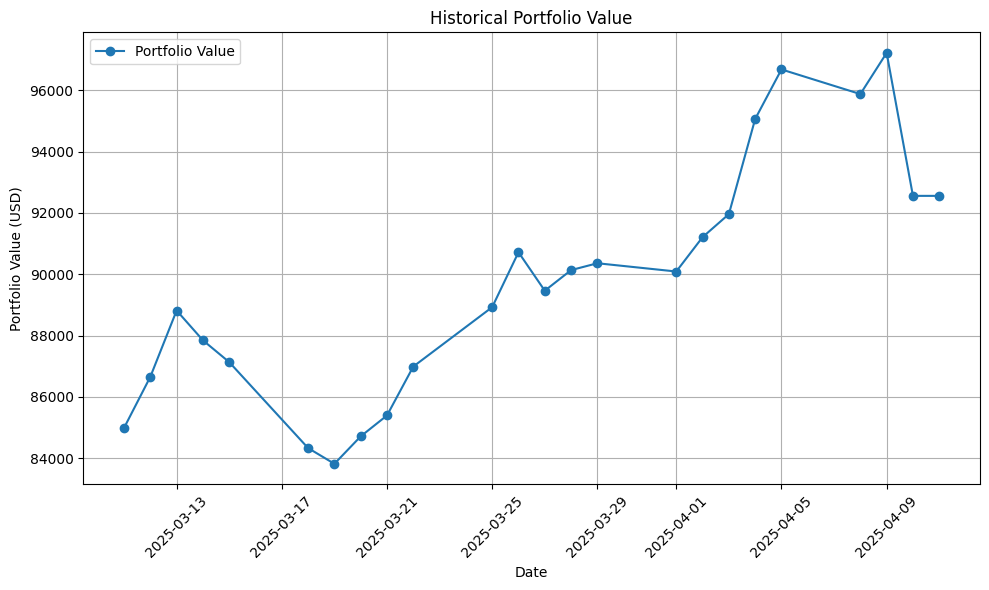

In [48]:
# Initialize REST client
api = REST(API_KEY, API_SECRET, BASE_URL)

# Fetch historical portfolio data
try:
    # Retrieve portfolio history
    history = api.get_portfolio_history(
        timeframe="1D",   # Interval for data points ("1Min", "5Min", "1H", "1D")
        period="1M"       # Duration of history ("1D", "1W", "1M", "1Y", "all")
    )

    # Extract timestamps and equity values
    timestamps = history.timestamp
    equity_values = history.equity

    # Convert timestamps to human-readable dates
    dates = [datetime.utcfromtimestamp(ts) for ts in timestamps]

    # Plot the historical portfolio value
    plt.figure(figsize=(10, 6))
    plt.plot(dates, equity_values, marker='o', linestyle='-', label="Portfolio Value")
    plt.title("Historical Portfolio Value")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value (USD)")
    plt.grid()
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"Error fetching portfolio history: {e}")